# Imports and setup

### Auto-re-import python modules, useful for editing local files

In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [2]:
import itertools
import warnings
from collections import Counter

import matplotlib as mpl
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
from tqdm import tqdm

pd.options.display.max_columns = 100

mpl.rcParams["figure.max_open_warning"] = 0

In [3]:
assert pl.__version__ == "1.9.0"

# Read in data

In [4]:
pq = "s3://seanome-kmerseek/scope-benchmark/analysis-outputs/2024-10-11__subsample_1000_queries/multisearch.subsampled.1000.protein.dayhoff.hp.pq"


multisearch_moltype_ksize = pl.read_parquet(pq)

/tmp/ipykernel_27330/2507419135.py:4: UserWarning: '(default_)region' not set; polars will try to get it from bucket

Set the region manually to silence this warning.
  multisearch_moltype_ksize = pl.read_parquet(pq)


In [5]:
multisearch_moltype_ksize

query_name,match_name,sourmash_score,score_value,scop_level,is_same,ksize,moltype
str,str,str,f64,str,bool,i32,str
"""d2cqka1 a.4.5.46 (A:43-130) La…","""d4j42a_ a.25.3.0 (A:) automate…","""containment_log10""",-1.924279,"""family""",false,5,"""protein"""
"""d2cqka1 a.4.5.46 (A:43-130) La…","""d4j42a_ a.25.3.0 (A:) automate…","""containment_log10""",-1.924279,"""superfamily""",false,5,"""protein"""
"""d2cqka1 a.4.5.46 (A:43-130) La…","""d4j42a_ a.25.3.0 (A:) automate…","""containment_log10""",-1.924279,"""fold""",false,5,"""protein"""
"""d2cqka1 a.4.5.46 (A:43-130) La…","""d4j42a_ a.25.3.0 (A:) automate…","""containment_log10""",-1.924279,"""class""",true,5,"""protein"""
"""d6vzda_ a.64.1.0 (A:) automate…","""d4j42a_ a.25.3.0 (A:) automate…","""containment_log10""",-1.875061,"""family""",false,5,"""protein"""
…,…,…,…,…,…,…,…
"""d2q6ka1 c.132.1.0 (A:1-163) au…","""d2q6ka1 c.132.1.0 (A:1-163) au…","""prob_overlap_adjusted_log10""",-2.187956,"""class""",true,60,"""hp"""
"""d2wcua_ c.133.1.0 (A:) automat…","""d2wcua_ c.133.1.0 (A:) automat…","""prob_overlap_adjusted_log10""",-2.250747,"""family""",true,60,"""hp"""
"""d2wcua_ c.133.1.0 (A:) automat…","""d2wcua_ c.133.1.0 (A:) automat…","""prob_overlap_adjusted_log10""",-2.250747,"""superfamily""",true,60,"""hp"""


In [6]:
mean = multisearch_moltype_ksize.group_by(
    [
        "moltype",
        "ksize",
        "sourmash_score",
        "scop_level",
        "is_same",
    ]
).agg(pl.col("score_value").mean())

mean

moltype,ksize,sourmash_score,scop_level,is_same,score_value
str,i32,str,str,bool,f64
"""hp""",28,"""intersect_hashes""","""superfamily""",false,1.908186
"""protein""",15,"""tf_idf_score_log10""","""family""",false,-1.683711
"""hp""",30,"""jaccard_log10""","""superfamily""",true,-0.094799
"""hp""",29,"""max_containment_log10""","""family""",true,-0.066894
"""hp""",35,"""max_containment_log10""","""family""",true,-0.014214
…,…,…,…,…,…
"""hp""",29,"""max_containment_log10""","""fold""",true,-0.116698
"""hp""",33,"""jaccard_log10""","""family""",false,-2.448107
"""hp""",50,"""tf_idf_score_log10""","""family""",false,-1.227104


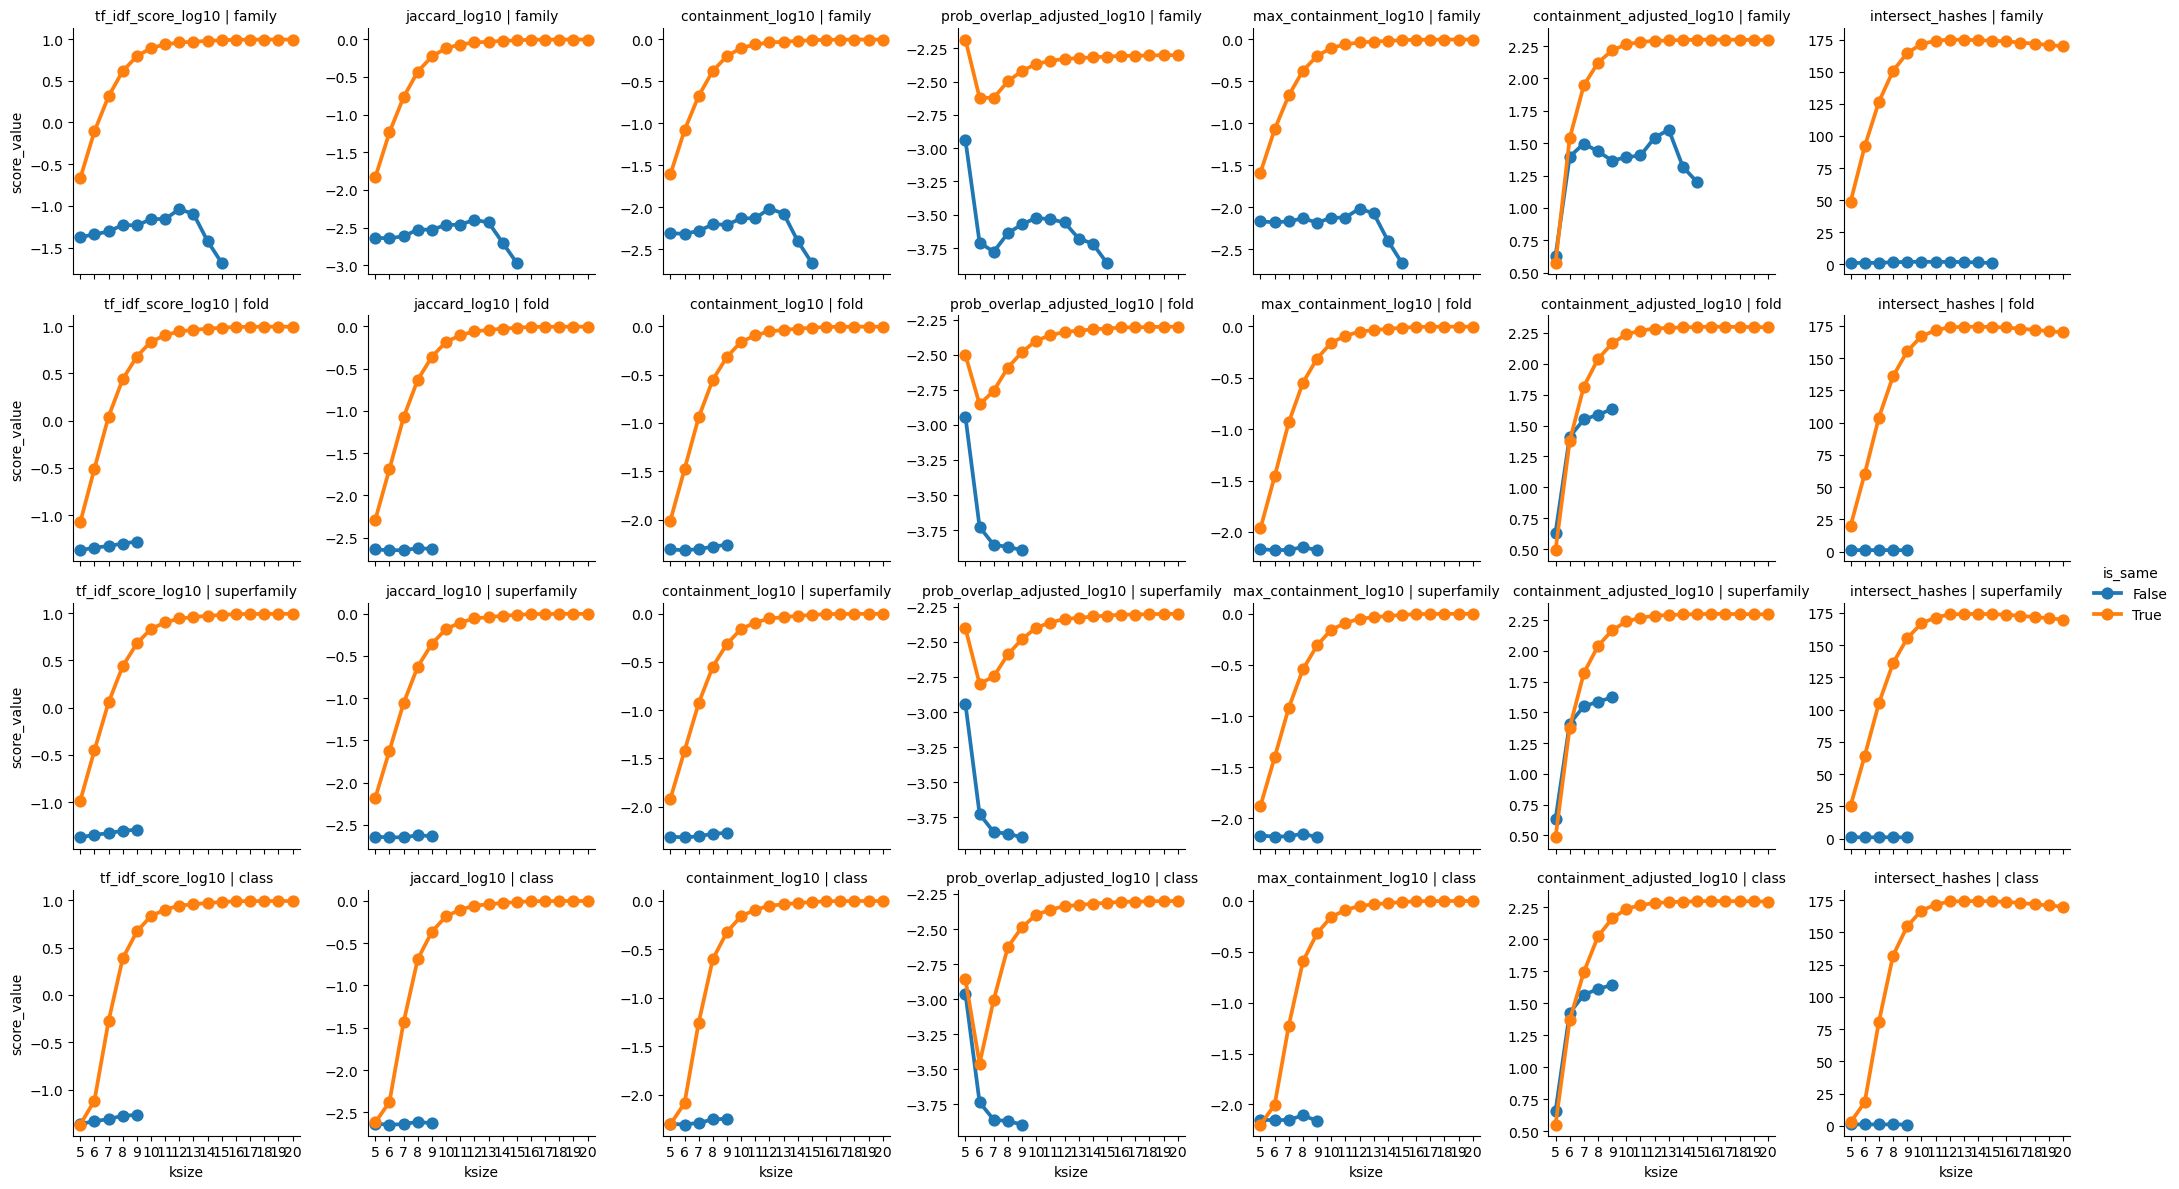

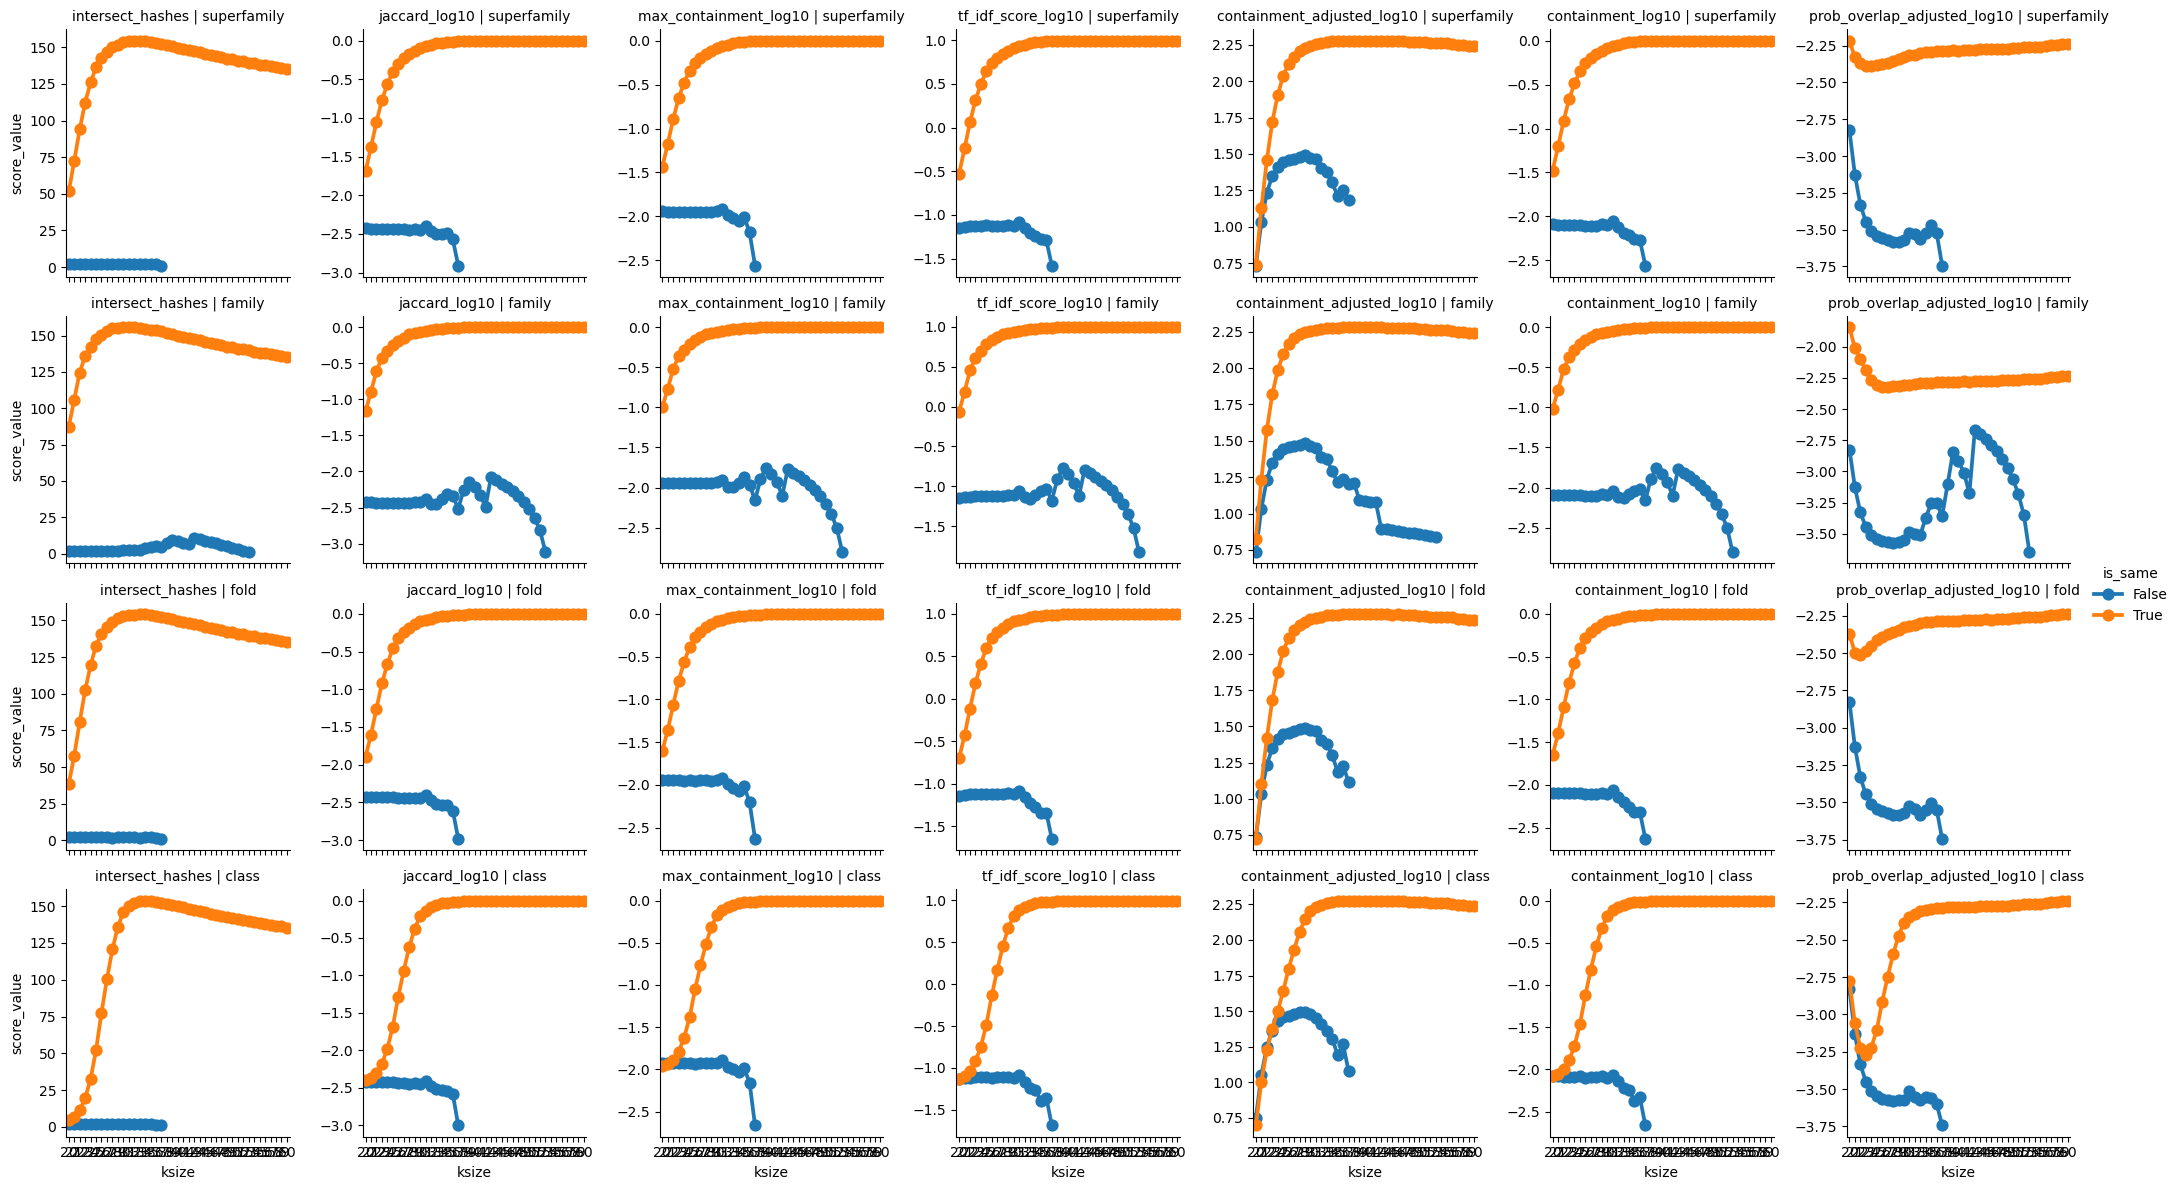

In [11]:
for moltype, df in mean.group_by("moltype"):
    g = sns.catplot(
        data=df,
        x="ksize",
        y="score_value",
        hue="is_same",
        row="scop_level",
        col="sourmash_score",
        kind="point",
        sharey=False,
        height=3,
    )
    g.set_titles("{col_name} | {row_name}")

In [9]:
# median = multisearch_moltype_ksize.group_by(
#     [
#         "moltype",
#         "ksize",
#         "sourmash_score",
#         "scop_level",
#         "is_same",
#     ]
# ).agg(pl.col("score_value").median())

# median

In [ ]:
sns.catplot(

In [7]:
# for moltype, df in multisearch_moltype_ksize.group_by("moltype"):

#     sns.catplot(
#         data=df,
#         x="ksize",
#         y="score_value",
#         hue="is_same",
#         row="scop_level",
#         col="sourmash_score",
#         kind="point",
#     )